In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [47]:
df = pd.read_csv(r'C:\Users\Chris\Desktop\The Sparks Foundation\Iris.csv')
df= df.drop('Id', axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


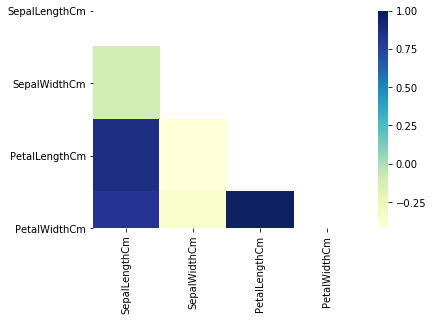

In [40]:
sns.heatmap(df.corr(), mask = np.triu(np.ones_like(df.corr(), dtype = bool)), cmap="YlGnBu")

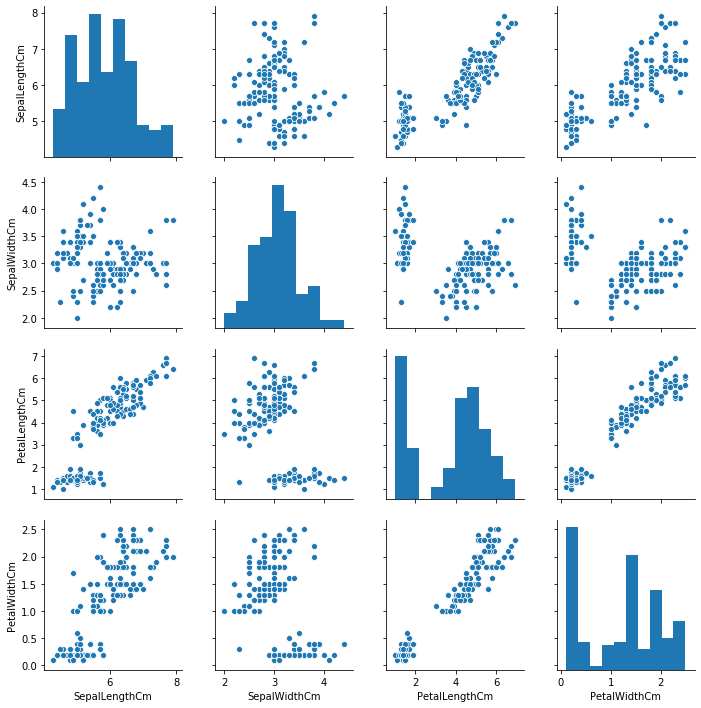

In [46]:
sns.pairplot(df)

In [42]:
inp = df.drop(['Species'], axis =1)
out = df['Species']

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inp, out, test_size = 0.2, random_state = 42)

In [44]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)
tree_pred = tree.predict(x_test)

from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
tree_cr = classification_report(y_test, tree_pred)
tree_cm = confusion_matrix(y_test, tree_pred)
tree_acc = metrics.accuracy_score(y_test, tree_pred)
print("Decision Tree Accuracy score: ", (tree_acc.round(3))*100, '%')
print("Decision Tree Confusion Matrix\n", tree_cm)
print(tree_cr)

Decision Tree Accuracy score:  100.0 %
Decision Tree Confusion Matrix
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [66]:
input_predict = [6.9, 2.8, 6.5, 2.4]
pred = np.array(input_predict).reshape(1,-1)
tree.predict(pred)

array(['Iris-virginica'], dtype=object)

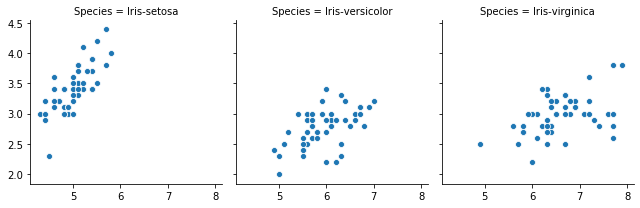

In [76]:
g = sns.FacetGrid(df, col = 'Species')
g.map_dataframe(sns.scatterplot, x = 'SepalLengthCm', y = 'SepalWidthCm')

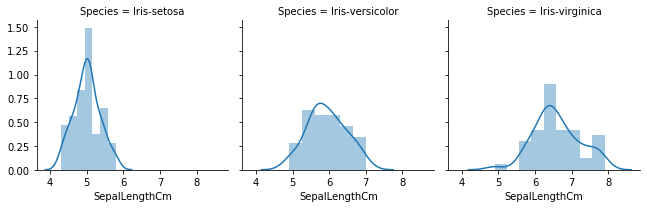

In [78]:
g = sns.FacetGrid(df, col = 'Species')
g.map(sns.distplot,'SepalLengthCm')